### Project : Chest x-ray images of Pneumoia

In [1]:
!pip install opencv-python

In [16]:
# Imports Libaries
import os
import matplotlib.pyplot as plt
from PIL import Image
import math
import numpy as np
import keras
# from keras_preprocessing.image import img_to_array
from tensorflow.keras.utils import array_to_img
from keras.preprocessing import image
import cv2
from skimage.io import imread
from pathlib import Path
import glob
import pandas as pd
from PIL import Image
from numpy import asarray
import numpy as np
import pandas as pd
import cv2
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import ResNet50
import tensorflow as tf

#### Read all train images from folder

In [2]:
# Load all train images from directory
data_dir = './train'
img_path = []
img_label = []

folds = os.listdir(data_dir)

for img in folds:
    foldpath = os.path.join(data_dir, img)
    imglist = os.listdir(foldpath)
    
    for file in imglist:
        fpath = os.path.join(foldpath, file)
        img_path.append(fpath)
        img_label.append(img)

# Load images and labels into arrays
images = []
for path in img_path:
    img = cv2.imread(path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to a consistent size
    images.append(img.flatten())  # Flatten the image array

# Convert image list to a numpy array
images = np.array(images)

# Create a DataFrame with image arrays and labels
df = pd.DataFrame({'train_images': images.tolist(), 'img_label': img_label})

# Display the DataFrame
df


,train_images,img_label
0,"[24, 24, 24, 20, 20, 20, 19, 19, 19, 17, 17, 1...",NORMAL
1,"[14, 14, 14, 24, 24, 24, 25, 25, 25, 31, 31, 3...",NORMAL
2,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 8, 8, 18, 18, 1...",NORMAL
3,"[40, 40, 40, 46, 46, 46, 47, 47, 47, 55, 55, 5...",NORMAL
4,"[77, 77, 77, 77, 77, 77, 62, 62, 62, 57, 57, 5...",NORMAL
...,...,...
5211,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",PNEUMONIA
5212,"[92, 92, 92, 98, 98, 98, 96, 96, 96, 93, 93, 9...",PNEUMONIA
5213,"[25, 25, 25, 23, 23, 23, 20, 20, 20, 14, 14, 1...",PNEUMONIA
5214,"[29, 29, 29, 37, 37, 37, 38, 38, 38, 40, 40, 4...",PNEUMONIA


#### Read all validation images from directory

In [3]:
# Load all validation images from directory
data_dir = './val'
img_path = []
img_label = []

folds = os.listdir(data_dir)

for img in folds:
    foldpath = os.path.join(data_dir, img)
    imglist = os.listdir(foldpath)
    
    for file in imglist:
        fpath = os.path.join(foldpath, file)
        img_path.append(fpath)
        img_label.append(img)

# Load images and labels into arrays
images = []
for path in img_path:
    img = cv2.imread(path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to a consistent size
    images.append(img.flatten())  # Flatten the image array

# Convert image list to a numpy array
images = np.array(images)

# Create a DataFrame with image arrays and labels
df_2 = pd.DataFrame({'Validation_images': images.tolist(), 'img_label': img_label})

# Display the DataFrame
df_2

,Validation_images,img_label
0,"[50, 50, 50, 0, 0, 0, 14, 14, 14, 19, 19, 19, ...",NORMAL
1,"[189, 189, 189, 0, 0, 0, 176, 176, 176, 86, 86...",NORMAL
2,"[55, 55, 55, 0, 0, 0, 77, 77, 77, 86, 86, 86, ...",NORMAL
3,"[123, 123, 123, 0, 0, 0, 173, 173, 173, 77, 77...",NORMAL
4,"[77, 77, 77, 1, 1, 1, 89, 89, 89, 17, 17, 17, ...",NORMAL
5,"[149, 149, 149, 4, 4, 4, 183, 183, 183, 64, 64...",NORMAL
6,"[8, 8, 8, 14, 14, 14, 24, 24, 24, 34, 34, 34, ...",NORMAL
7,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",NORMAL
8,"[16, 16, 16, 19, 19, 19, 20, 20, 20, 19, 19, 1...",PNEUMONIA
9,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, ...",PNEUMONIA


#### Read all Test images from directory

In [4]:
# Load all test images from directory
data_dir = './test'
img_path = []
img_label = []

folds = os.listdir(data_dir)

for img in folds:
    foldpath = os.path.join(data_dir, img)
    imglist = os.listdir(foldpath)
    
    for file in imglist:
        fpath = os.path.join(foldpath, file)
        img_path.append(fpath)
        img_label.append(img)

# Load images and labels into arrays
images = []
for path in img_path:
    img = cv2.imread(path)  # Read the image using OpenCV
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
    img = cv2.resize(img, (224, 224))  # Resize the image to a consistent size
    images.append(img.flatten())  # Flatten the image array

# Convert image list to a numpy array
images = np.array(images)

# Create a DataFrame with image arrays and labels
df_3 = pd.DataFrame({'test_images': images.tolist(), 'img_label': img_label})

# Display the DataFrame
df_3

,test_images,img_label
0,"[32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 3...",NORMAL
1,"[40, 40, 40, 36, 36, 36, 30, 30, 30, 31, 31, 3...",NORMAL
2,"[43, 43, 43, 39, 39, 39, 37, 37, 37, 37, 37, 3...",NORMAL
3,"[70, 70, 70, 73, 73, 73, 73, 73, 73, 77, 77, 7...",NORMAL
4,"[44, 44, 44, 39, 39, 39, 39, 39, 39, 41, 41, 4...",NORMAL
...,...,...
619,"[46, 46, 46, 41, 41, 41, 31, 31, 31, 44, 44, 4...",PNEUMONIA
620,"[164, 164, 164, 135, 135, 135, 101, 101, 101, ...",PNEUMONIA
621,"[22, 22, 22, 18, 18, 18, 14, 14, 14, 13, 13, 1...",PNEUMONIA
622,"[212, 212, 212, 208, 208, 208, 47, 47, 47, 54,...",PNEUMONIA


#### # Build a CNN model


In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load data and create the DataFrame df, df_2and df_3 as mentioned above

# Preprocess the data
def preprocess_image(image):
    image = np.array(image)  # Convert the list to a numpy array
    image = image / 255.0    # Normalize pixel values to [0, 1]
    return image.reshape(224, 224, 3)  # Reshape the image back to its original dimensions

# Convert labels to numerical format
label_encoder = LabelEncoder()
df['img_label'] = label_encoder.fit_transform(df['img_label'])
df_2['img_label'] = label_encoder.transform(df_2['img_label'])
df_3['img_label'] = label_encoder.transform(df_3['img_label'])


# Split data into features (images) and labels
train_images = np.array([preprocess_image(img) for img in df['train_images']])
train_labels = to_categorical(df['img_label'])  # Convert labels to one-hot encoded format

val_images = np.array([preprocess_image(img) for img in df_2['Validation_images']])
val_labels = to_categorical(df_2['img_label'])

test_images = np.array([preprocess_image(img) for img in df_3['test_images']])
test_labels = to_categorical(df_3['img_label'])


# Create a CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 8
batch_size = 32

history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))

# valid the model
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print("Validation accuracy:", val_accuracy)

Epoch 1/8
163/163 [==============================] - 386s 2s/step - loss: 0.2550 - accuracy: 0.9059 - val_loss: 0.2477 - val_accuracy: 0.8750
Epoch 2/8
163/163 [==============================] - 160s 984ms/step - loss: 0.1079 - accuracy: 0.9605 - val_loss: 0.1732 - val_accuracy: 1.0000
Epoch 3/8
163/163 [==============================] - 161s 990ms/step - loss: 0.0799 - accuracy: 0.9712 - val_loss: 0.1011 - val_accuracy: 1.0000
Epoch 4/8
163/163 [==============================] - 158s 968ms/step - loss: 0.0594 - accuracy: 0.9781 - val_loss: 0.6893 - val_accuracy: 0.7500
Epoch 5/8
163/163 [==============================] - 156s 959ms/step - loss: 0.0465 - accuracy: 0.9816 - val_loss: 0.3492 - val_accuracy: 0.8750
Epoch 6/8
163/163 [==============================] - 156s 956ms/step - loss: 0.0276 - accuracy: 0.9906 - val_loss: 0.4491 - val_accuracy: 0.8750
Epoch 7/8
163/163 [==============================] - 156s 955ms/step - loss: 0.0217 - accuracy: 0.9919 - val_loss: 0.0411 - val_accur

#### Data Visualization of the model

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

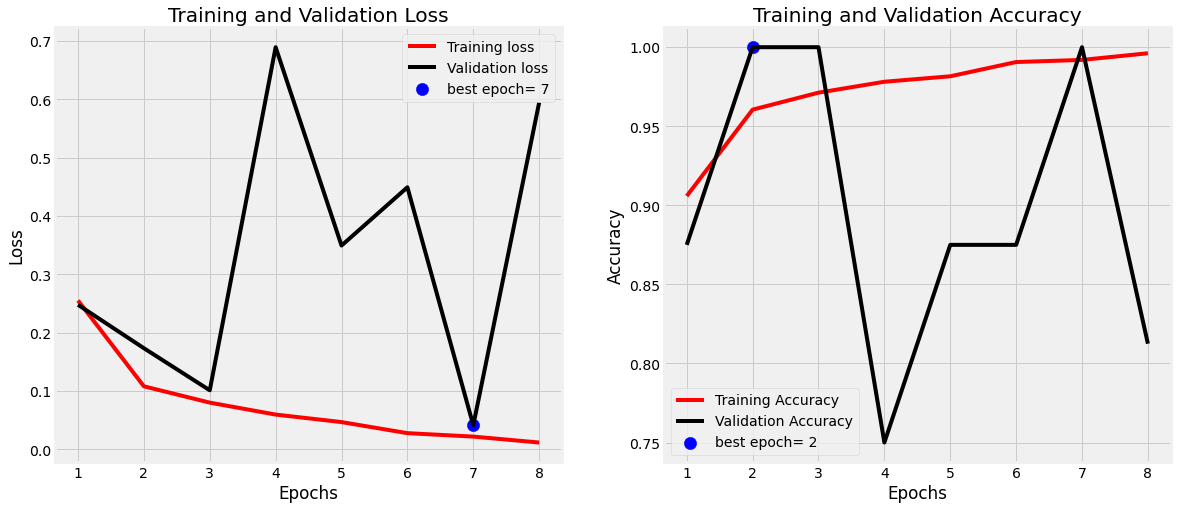

In [6]:
# plot the performance of model

train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(train_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history

plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')


# training data vs validation data

plt.subplot(1, 2, 2)
plt.plot(Epochs, train_acc, 'red', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'black', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 1)
plt.plot(Epochs, train_loss, 'red', label= 'Training loss')
plt.plot(Epochs, val_loss, 'black', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()



plt.tight_layout

In [7]:
# Print unique labels in different datasets
print("Training Labels:", df['img_label'].unique())
print("Validation Labels:", df_2['img_label'].unique())
print("Test Labels:", df_3['img_label'].unique())
print("Label Encoder Classes:", label_encoder.classes_)


Training Labels: [0 1]
Validation Labels: [0 1]
Test Labels: [0 1]
Label Encoder Classes: ['NORMAL' 'PNEUMONIA']


#### Test Accuracy got from CNN model  is 71 %

In [8]:
# Evaluate the model on the test dataset

loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 4s 210ms/step - loss: 2.3388 - accuracy: 0.7115
Test Accuracy: 0.7115384340286255


#### Confusion Matrix using CNN Model

20/20 [==============================] - 4s 205ms/step


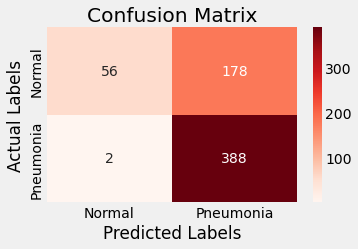

In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Predict labels using the trained model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert one-hot encoded predictions to labels

# Convert one-hot encoded test_labels to labels
actual_labels = np.argmax(test_labels, axis=1)

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)


# Plot the confusion matrix
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",xticklabels=["Normal", "Pneumonia"],yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


### Using  Another  Model: Resnet-50 to Compare with CNN

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical

# Load data and create the DataFrame df and df_2 as mentioned above

# Preprocess the data
def preprocess_image(image):
    image = np.array(image)  # Convert the list to a numpy array
    image = image / 255.0    # Normalize pixel values to [0, 1]
    return image.reshape(224, 224, 3)  # Reshape the image back to its original dimensions

# Convert labels to numerical format
label_encoder = LabelEncoder()
df['img_label'] = label_encoder.fit_transform(df['img_label'])
df_2['img_label'] = label_encoder.transform(df_2['img_label'])
df_3['img_label'] = label_encoder.transform(df_3['img_label'])

# Split data into features (images) and labels
train_images = np.array([preprocess_image(img) for img in df['train_images']])
train_labels = to_categorical(df['img_label'])  # Convert labels to one-hot encoded format

val_images = np.array([preprocess_image(img) for img in df_2['Validation_images']])
val_labels = to_categorical(df_2['img_label'])

test_images = np.array([preprocess_image(img) for img in df_3['test_images']])
test_labels = to_categorical(df_3['img_label'])

# Create a ResNet-50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(len(label_encoder.classes_), activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
num_epochs = 8
batch_size = 32

history = model.fit(train_images, train_labels, epochs=num_epochs, batch_size=batch_size, validation_data=(val_images, val_labels))

# validate the model
val_loss, val_accuracy = model.evaluate(val_images, val_labels)
print("Validation accuracy:", val_accuracy)


Epoch 1/8
163/163 [==============================] - 1201s 7s/step - loss: 0.6691 - accuracy: 0.9534 - val_loss: 597.6794 - val_accuracy: 0.5000
Epoch 2/8
163/163 [==============================] - 1180s 7s/step - loss: 0.1005 - accuracy: 0.9670 - val_loss: 1963.2820 - val_accuracy: 0.5000
Epoch 3/8
163/163 [==============================] - 1190s 7s/step - loss: 0.0566 - accuracy: 0.9810 - val_loss: 33.4609 - val_accuracy: 0.5000
Epoch 4/8
163/163 [==============================] - 978s 6s/step - loss: 0.0306 - accuracy: 0.9902 - val_loss: 1.7698 - val_accuracy: 0.5000
Epoch 5/8
163/163 [==============================] - 1511s 9s/step - loss: 0.0174 - accuracy: 0.9937 - val_loss: 13.3222 - val_accuracy: 0.5000
Epoch 6/8
163/163 [==============================] - 1215s 7s/step - loss: 0.0143 - accuracy: 0.9942 - val_loss: 8.0850 - val_accuracy: 0.5000
Epoch 7/8
163/163 [==============================] - 4217s 26s/step - loss: 0.0358 - accuracy: 0.9877 - val_loss: 0.0109 - val_accuracy:

#### Test Accuracy got from Resnet-50 model  is 67 %


In [13]:
# Evaluate the model on the test dataset

loss, test_accuracy = model.evaluate(test_images, test_labels)
print("Test Accuracy:", test_accuracy)


20/20 [==============================] - 25s 1s/step - loss: 4.3774 - accuracy: 0.6763
Test Accuracy: 0.6762820482254028


#### Confusion Matrix using Resnet-50 Model

20/20 [==============================] - 25s 1s/step


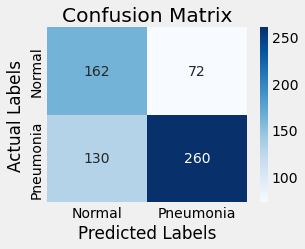

In [17]:
# Confusion Matrix
# Predict labels using the trained model
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)  # Convert probabilities to labels

# Convert one-hot encoded test_labels to labels
actual_labels = np.argmax(test_labels, axis=1)

# Create the confusion matrix
cm = confusion_matrix(actual_labels, predicted_labels)

 
# Plot the confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "Pneumonia"], yticklabels=["Normal", "Pneumonia"])
plt.xlabel('Predicted Labels')
plt.ylabel('Actual Labels')
plt.title('Confusion Matrix')
plt.show()


#### Using two types of deep leanring approches one is CNN and another one is Resnet-50. Both are compare as baseline. Our verdict analysis that CNN perform better (71%) than Resnet-50 (67%) for chest-xray images of Pneumonia prediction.  